## Estadistica Aplicada
Seccion 16 - 27 oct 2023

Francisco Humberto Villegas Reyna 1731722 gpo43

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import pmdarima as pm

In [3]:
pasajeros= pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv', index_col='Month', parse_dates=True)

In [4]:
pasajeros

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [5]:
pasajeros= pasajeros.asfreq('MS')

In [6]:
pasajeros.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

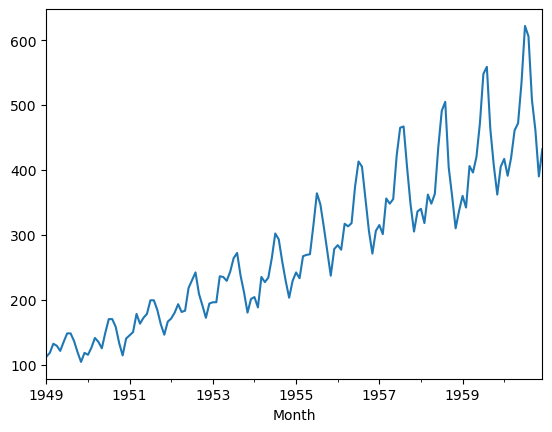

In [7]:
pasajeros['Thousands of Passengers'].plot();

Esta serie tiene tendencia positiva y componente estacional

In [8]:
prueba_dfa= adfuller(pasajeros['Thousands of Passengers'])
pvalue= prueba_dfa[1]
pvalue.round(2)

0.99

No rechazamos H0, significa que thousands of passenger es una serie no estacionaria

In [9]:
pasajeros['1eras_diff']= pasajeros['Thousands of Passengers'].diff()

In [10]:
prueba_dfa1= adfuller(pasajeros['1eras_diff'].dropna())
pvalue1= prueba_dfa1[1]
pvalue1.round(3)

0.054

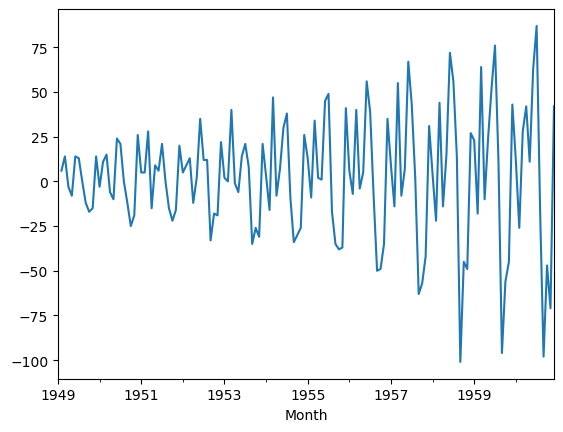

In [11]:
pasajeros['1eras_diff'].plot();

In [12]:
pasajeros['2das_diff']= pasajeros['1eras_diff'].diff()

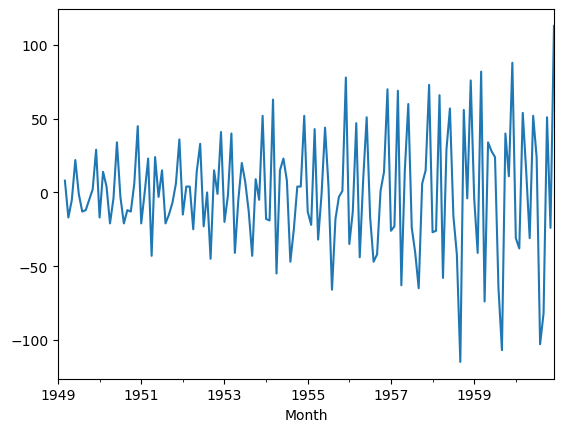

In [13]:
pasajeros['2das_diff'].plot();

In [15]:
prueba_dfa2= adfuller(pasajeros['2das_diff'].dropna())
pvalue2= prueba_dfa2[1]
pvalue2.round(2)

0.0

Rechazamos H0, significa que las 2das de 'Thousands of Passengers' dif son estacionarias

* passengers I(2)

* 1eras diferencias I(1)

* 2das diferencias I(0)

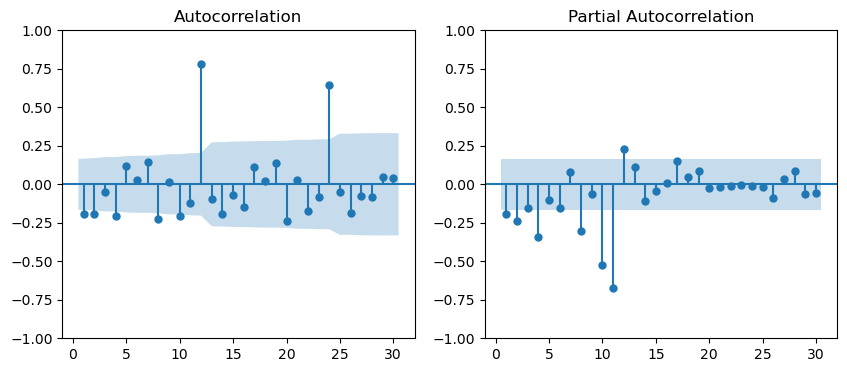

In [17]:
## correlaciones
ig, ax=plt.subplots(1,2, figsize=(10,4))
##1a grafica
plot_acf(pasajeros['2das_diff'].dropna(), zero=False, lags=30, ax=ax[0])
# 2a grafica
plot_pacf(pasajeros['2das_diff'].dropna(), zero=False, lags=30, ax=ax[1])
plt.show()

Serie con datos estacionarios

Estos patrones repetitivos de las graficas de autocorrelacion nos muestran una serie con componenete estacional

In [20]:
# determinar el orden
# vamos a utilizar autoarima
pm.auto_arima(pasajeros['2das_diff'].dropna(),start_p=1, start_q=1, max_p=7, max_q=7, m=12, ic='aic', seasonal=True, start_P=1, start_Q=1, max_Q=7, max_P=7)

ARIMA(order=(5, 0, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

SARIMA(p,I(d),q)(P,D,Q)

* passengers      SARIMA(5,2,0)(2,1,0,12)
* 1as diferencias SARIMA(5,1,0)(2,1,0,12)
* 2das diferencias SARIMA(5,0,0)(2,1,0,12)

In [22]:
# Estimar modelo
model = ARIMA(pasajeros['Thousands of Passengers'], order=(5,2,0), seasonal_order=(2,1,0,12))
result = model.fit()
print(result.summary())

                                    SARIMAX Results                                     
Dep. Variable:          Thousands of Passengers   No. Observations:                  144
Model:             ARIMA(5, 2, 0)x(2, 1, 0, 12)   Log Likelihood                -513.021
Date:                          Thu, 26 Oct 2023   AIC                           1042.042
Time:                                  16:07:45   BIC                           1064.982
Sample:                              01-01-1949   HQIC                          1051.363
                                   - 12-01-1960                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1473      0.097    -11.874      0.000      -1.337      -0.958
ar.L2         -0.8773      0.119     -7.382      0.

In [23]:
pasajeros['modelo_sarima']=result.predict()

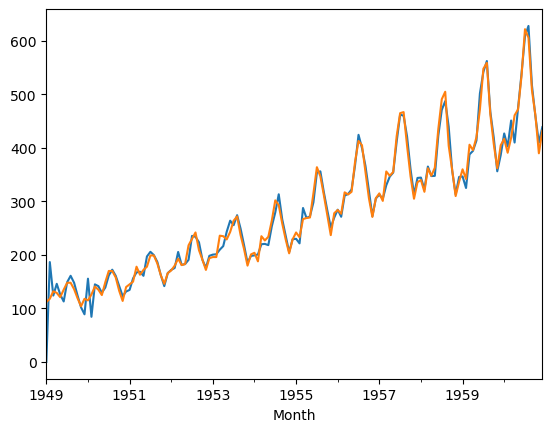

In [24]:
pasajeros['modelo_sarima'].plot()
pasajeros['Thousands of Passengers'].plot();

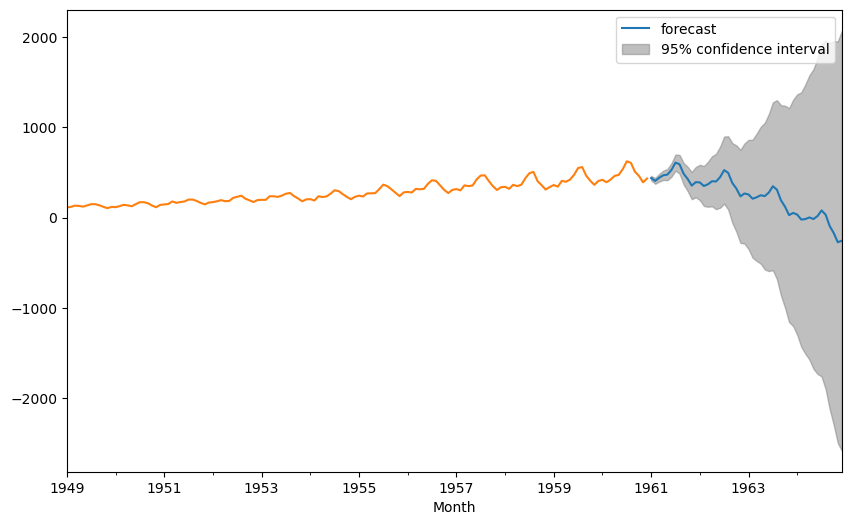

In [25]:
#  pronosticos
plt.rcParams['figure.figsize']=(10,6)
plot_predict(result, start='1961-01-01', end='1964-12-01')
pasajeros['Thousands of Passengers'].plot()
plt.show()